In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [0]:
data=pd.read_csv("datasetnlp.csv")

In [119]:
data.head(5)

,Created_Time,Presidential_Candidate,Message
0,2017-06-30T20:20:00+0000,Nana Addo Dankwa Akufo-Addo,NaN
1,2017-06-30T18:04:02+0000,Nana Addo Dankwa Akufo-Addo,"This afternoon, I held my maiden durbar with a..."
2,2017-06-30T07:55:38+0000,Nana Addo Dankwa Akufo-Addo,Congratulations to Prempeh College for winning...
3,2017-06-29T14:45:54+0000,Nana Addo Dankwa Akufo-Addo,"""I was the Guest of Honour at the 53rd Zambia ..."
4,2017-06-29T12:15:15+0000,Nana Addo Dankwa Akufo-Addo,NaN


Drop Post without any Message

In [0]:
data.dropna(subset = ["Message"], inplace=True)

Number of characters present in each Message Posted

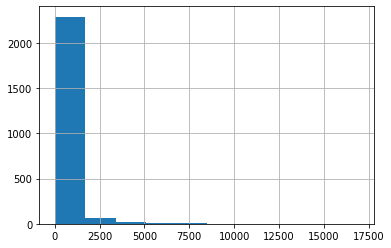

In [121]:
data['Message'].str.len().hist()

In [122]:
data.shape

(2394, 3)

Number of words in a Message

In [0]:
def plot_word_number_histogram(text):
    text.str.split().\
        map(lambda x: len(x)).\
        hist()

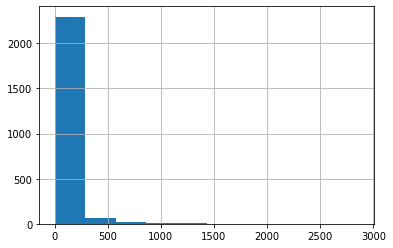

In [124]:

plot_word_number_histogram(data['Message'])

Average word length of Message

In [0]:
import numpy as np

def plot_word_length_histogram(text):
    text.str.split().\
        apply(lambda x : [len(i) for i in x]). \
        map(lambda x: np.mean(x)).\
        hist()

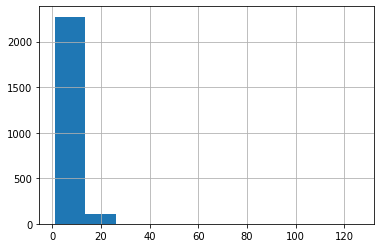

In [126]:

plot_word_length_histogram(data['Message'])

Analysing Stopwords that are most commonly used in any Message

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords

In [0]:
def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

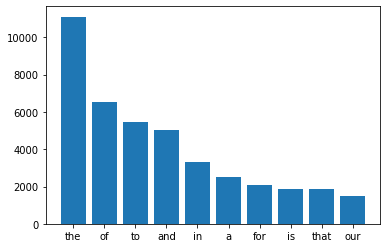

In [129]:
plot_top_stopwords_barchart(data['Message'])

Words other than these stopwords that occur frequently

In [0]:
import seaborn as sns
from nltk.corpus import stopwords
from collections import  Counter

In [0]:
def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)

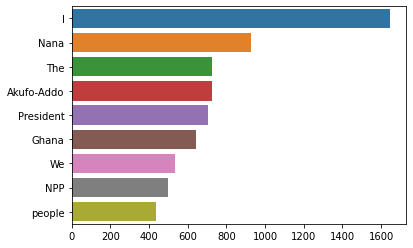

In [132]:
plot_top_non_stopwords_barchart(data['Message'])

Ngram exploration - Ngrams are simply contiguous sequences of n words. For example “riverbank”,” The three musketeers” etc.If the number of words is two, it is called bigram. For 3 words it is called a trigram and so on.

In [0]:
import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter

In [0]:
def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

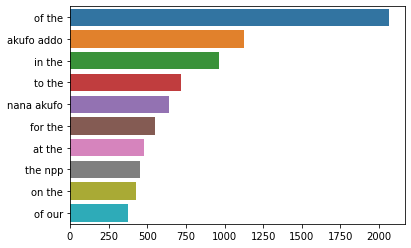

In [135]:
plot_top_ngrams_barchart(data['Message'],2)

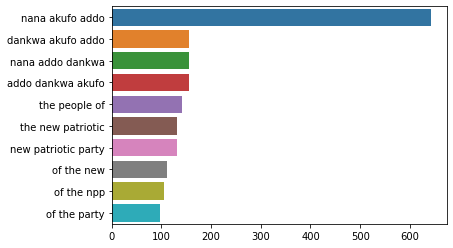

In [136]:
plot_top_ngrams_barchart(data['Message'],3)

In [137]:
pip install pyldavis

Topic Modeling exploration with pyLDAvis - Topic modeling is the process of using unsupervised learning techniques to extract the main topics that occur in a collection of documents.

In [0]:
import numpy as np
import nltk
from nltk.corpus import stopwords
import gensim
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
import pyLDAvis.gensim


In [0]:
def get_lda_objects(text):
    nltk.download('stopwords')    
    stop=set(stopwords.words('english'))

    
    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    dic=gensim.corpora.Dictionary(corpus)
    bow_corpus = [dic.doc2bow(doc) for doc in corpus]
    
    lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 4, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
    
    return lda_model, bow_corpus, dic

def plot_lda_vis(lda_model, bow_corpus, dic):
    pyLDAvis.enable_notebook()
    vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dic)
    return vis

In [140]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [141]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Package cess_esp is already up-to-date!
[nltk_data]    | Downloading packag

True

In [142]:
lda_model, bow_corpus, dic = get_lda_objects(data['Message'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [143]:
lda_model.show_topics()

[(0,
  '0.024*"Nana" + 0.023*"Akufo-Addo" + 0.014*"NPP" + 0.011*"Ghana" + 0.009*"2016" + 0.009*"The" + 0.006*"constituency" + 0.006*"party" + 0.006*"Addo" + 0.005*"election"'),
 (1,
  '0.015*"Ghana" + 0.008*"country" + 0.008*"The" + 0.007*"people" + 0.006*"President" + 0.006*"nation" + 0.005*"government" + 0.004*"NPP" + 0.004*"Ghanaians" + 0.004*"year"'),
 (2,
  '0.016*"President" + 0.013*"Mahama" + 0.010*"Ghana" + 0.008*"The" + 0.006*"Africa" + 0.006*"John" + 0.006*"also" + 0.005*"http" + 0.004*"African" + 0.004*"country"'),
 (3,
  '0.010*"President" + 0.006*"Ghana" + 0.005*"ChangeIsComing" + 0.005*"Mahama" + 0.005*"VoteForChange" + 0.005*"The" + 0.004*"http" + 0.004*"people" + 0.003*"country" + 0.003*"also"')]

In [144]:
plot_lda_vis(lda_model, bow_corpus, dic)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.024865  0.071702       1        1  38.913979
0      0.114611 -0.022642       2        1  32.628956
2     -0.090950  0.036974       3        1  18.504841
3     -0.048526 -0.086035       4        1   9.952228, topic_info=            Term        Freq       Total Category  logprob  loglift
1220        Nana  880.000000  880.000000  Default  30.0000  30.0000
245   Akufo-Addo  900.000000  900.000000  Default  29.0000  29.0000
85     President  704.000000  704.000000  Default  28.0000  28.0000
6         Mahama  475.000000  475.000000  Default  27.0000  27.0000
2120         NPP  615.000000  615.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
899        power   18.480061  132.586945   Topic4  -6.2227   0.3368
73           day   18.332027  180.659760   Topic4  -6.2308   0.0194
245   Akufo-Addo   20.594681  900.984314   Topic4  -6.1144  -1.4711
9           This   17.831902  272.728333   Topic4  -6.2584  -0.4201
2120         NPP   17.894451  615.710571   Topic4  -6.2549  -1.2309

[350 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
2117      1  0.016930    ...
2117      2  0.474028    ...
2117      3  0.220084    ...
2117      4  0.287803    ...
122       1  0.192409   2016
...     ...       ...    ...
244       4  0.077450   year
738       1  0.727342  youth
738       2  0.211591  youth
738       3  0.013224  youth
738       4  0.052898  youth

[711 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3, 4])

Wordcloud

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
import nltk

def plot_wordcloud(text):
    nltk.download('stopwords')
    stop=set(stopwords.words('english'))

    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=100,
        max_font_size=30, 
        scale=3,
        random_state=1)
    
    wordcloud=wordcloud.generate(str(corpus))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
 
    plt.imshow(wordcloud)
    plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


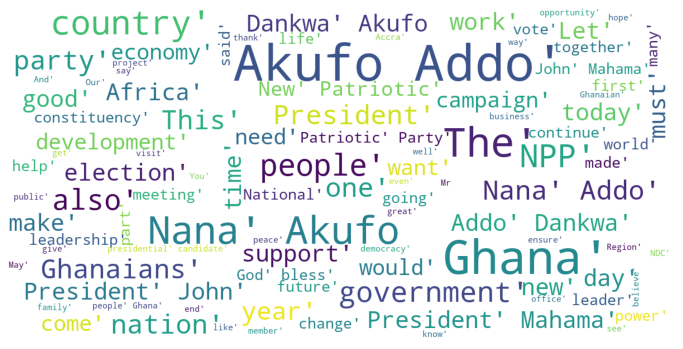

In [146]:
plot_wordcloud(data['Message'])

Sentiment analysis

In [147]:
from textblob import TextBlob
    
def plot_polarity_histogram(text):
    
    def _polarity(text):
        return TextBlob(text).sentiment.polarity
        
    polarity_score =text.apply(lambda x : _polarity(x))
    polarity_score.hist()
[5]

[5]

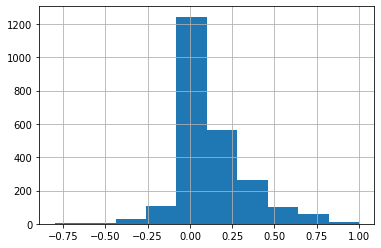

In [148]:

plot_polarity_histogram(data['Message'])

 Sentiment Barchart

In [0]:
from textblob import TextBlob
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

def sentiment_vader(text, sid):
    ss = sid.polarity_scores(text)
    ss.pop('compound')
    return max(ss, key=ss.get)

def sentiment_textblob(text):
        x = TextBlob(text).sentiment.polarity
        
        if x<0:
            return 'neg'
        elif x==0:
            return 'neu'
        else:
            return 'pos'

def plot_sentiment_barchart(text, method='TextBlob'):
    if method == 'TextBlob':
        sentiment = text.map(lambda x: sentiment_textblob(x))
    elif method == 'Vader':
        nltk.download('vader_lexicon')
        sid = SentimentIntensityAnalyzer()
        sentiment = text.map(lambda x: sentiment_vader(x, sid=sid))
    else:
        raise ValueError('Textblob or Vader')
    
    plt.bar(sentiment.value_counts().index,
            sentiment.value_counts())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


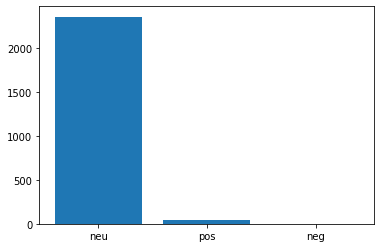

In [150]:
plot_sentiment_barchart(data['Message'], method='Vader')

Named Entity Recognition - Named entity recognition is an information extraction method in which entities that are present in the text are classified into predefined entity types like “Person”,” Place”,” Organization”, etc. By using NER we can get great insights about the types of entities present in the given text dataset.

In [0]:
import spacy

nlp = spacy.load("en_core_web_sm")

In [0]:
import spacy
from collections import  Counter
import seaborn as sns

def plot_named_entity_barchart(text):
    nlp = spacy.load("en_core_web_sm")
    
    def _get_ner(text):
        doc=nlp(text)
        return [X.label_ for X in doc.ents]
    
    ent=text.apply(lambda x : _get_ner(x))
    ent=[x for sub in ent for x in sub]
    counter=Counter(ent)
    count=counter.most_common()
    
    x,y=map(list,zip(*count))
    sns.barplot(x=y,y=x)

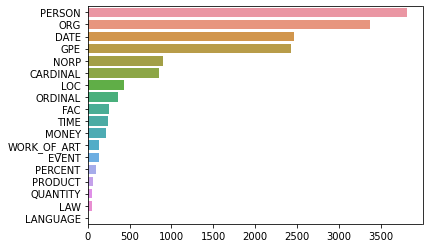

In [153]:
plot_named_entity_barchart(data['Message'])

Most Common Named Entity Barchart

In [0]:
import spacy
from collections import  Counter
import seaborn as sns

def plot_most_common_named_entity_barchart(text, entity="PERSON"):
    nlp = spacy.load("en_core_web_sm")
    
    def _get_ner(text,ent):
        doc=nlp(text)
        return [X.text for X in doc.ents if X.label_ == ent]

    entity_filtered=text.apply(lambda x: _get_ner(x,entity))
    entity_filtered=[i for x in entity_filtered for i in x]
    
    counter=Counter(entity_filtered)
    x,y=map(list,zip(*counter.most_common(10)))
    sns.barplot(y,x).set_title(entity)

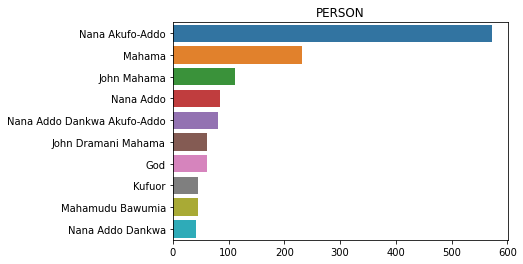

In [155]:
plot_most_common_named_entity_barchart(data['Message'], entity="PERSON")

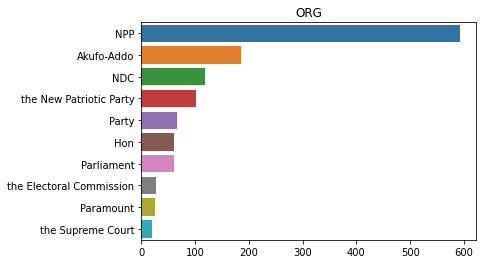

In [156]:
plot_most_common_named_entity_barchart(data['Message'], entity="ORG")

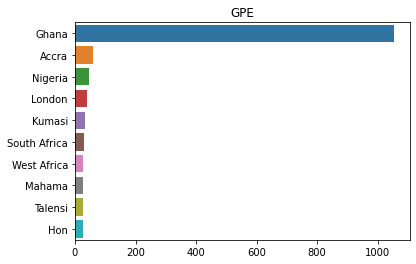

In [157]:
plot_most_common_named_entity_barchart(data['Message'], entity="GPE")